In [2]:
# -*- coding: utf-8 -*-
"""
Spyder Editor
This is a temporary script file.
"""
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 28 22:49:30 2017
@author: xinyingpeng
"""
# Part 1 - Building the CNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
#these 2 lines are for timer
from timeit import default_timer as timer
start = timer()

model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(300, 300, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

training_set = train_datagen.flow_from_directory('./Data_Collection_cnn/train/',
                                                 target_size = (300, 300),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('./Data_Collection_cnn/test/',
                                            target_size = (300, 300),
                                            batch_size = 32,
                                            class_mode = 'categorical')
history = model.fit_generator(training_set,
                         steps_per_epoch = 331,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 82)
# elapsed time in minutes
end = timer()
print("Elapsed time in minutes")
print(0.1*round((end - start)/6))
# end of work message

Found 331 images belonging to 3 classes.
Found 82 images belonging to 3 classes.
Epoch 1/20
331/331 [==============================] - 1470s 4s/step - loss: 0.2556 - acc: 0.8854 - val_loss: 1.0173 - val_acc: 0.8411
Epoch 2/20
331/331 [==============================] - 1475s 4s/step - loss: 2.0215e-05 - acc: 1.0000 - val_loss: 1.2719 - val_acc: 0.8535
Epoch 3/20
331/331 [==============================] - 1492s 5s/step - loss: 2.9844e-06 - acc: 1.0000 - val_loss: 1.3930 - val_acc: 0.8544
Epoch 4/20
331/331 [==============================] - 1465s 4s/step - loss: 1.2942e-06 - acc: 1.0000 - val_loss: 1.4945 - val_acc: 0.8651
Epoch 5/20
331/331 [==============================] - 1536s 5s/step - loss: 7.3202e-07 - acc: 1.0000 - val_loss: 1.4850 - val_acc: 0.8549
Epoch 6/20
331/331 [==============================] - 1635s 5s/step - loss: 4.6930e-07 - acc: 1.0000 - val_loss: 1.5442 - val_acc: 0.8535
Epoch 7/20
331/331 [==============================] - 1489s 4s/step - loss: 3.4638e-07 - acc: 1

In [3]:
#save your model
from keras.models import load_model
classifier.save('20180401_model')

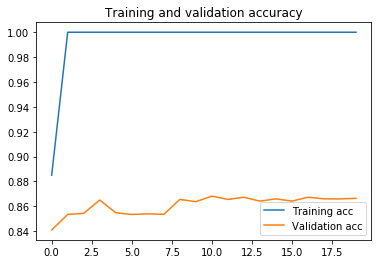

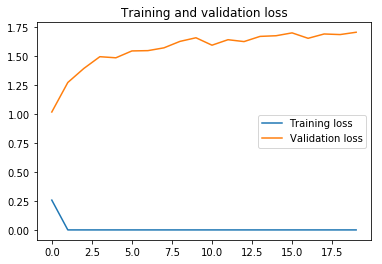

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import os
os.system('say "your program has finished"')
# elapsed time in minutes
#use your model in
#-----------------
from keras.preprocessing import image as image_utils
import numpy as np
classifier = load_model('./20180327_model')
#tired is o    untired is 1
test_image = image_utils.load_img('D:\\picture\\zack\\untired\\test_412.jpeg', target_size=(300, 300))
test_image = image_utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
#result = classifier.predict_on_batch(test_image)
result = classifier.predict(test_image)